Import library yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

**Insight:**
- Proyek ini memerlukan library pandas dan numpy, modul pyplot dari library matplotlib, module feature_extraction.text dari library sklearn, dan fungsi cosine_similarity dari library sklearn melalui modul metrics.pairwise.

Mengupload file kaggle.json untuk kebutuhan download dataset melalui Kaggle API

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"avelticoalu","key":"519745e75a28acc76c1ec774cce1cc17"}'}

**Insight:**
- File kaggle.json diperlukan untuk dapat menggunakan Kaggle API untuk kebutuhan mendownload dataset dari Kaggle.

Download dataset dari kaggle dan ekstrak file zip dataset

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d hernan4444/anime-recommendation-database-2020

!unzip /content/anime-recommendation-database-2020.zip

Dataset URL: https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020
License(s): CC0-1.0
 97% 641M/661M [00:03<00:00, 182MB/s]
100% 661M/661M [00:03<00:00, 195MB/s]
Archive:  /content/anime-recommendation-database-2020.zip
  inflating: anime.csv               
  inflating: anime_with_synopsis.csv  
  inflating: animelist.csv           
  inflating: html folder/html/1/details.html  
  inflating: html folder/html/1/pictures.html  
  inflating: html folder/html/1/recomendations.html  
  inflating: html folder/html/1/reviews_1.html  
  inflating: html folder/html/1/reviews_10.html  
  inflating: html folder/html/1/reviews_11.html  
  inflating: html folder/html/1/reviews_12.html  
  inflating: html folder/html/1/reviews_13.html  
  inflating: html folder/html/1/reviews_14.html  
  inflating: html folder/html/1/reviews_15.html  
  inflating: html folder/html/1/reviews_16.html  
  inflating: html folder/html/1/reviews_17.html  
  inflating: html folder/html/1/reviews_18

**Insight:**
- Dengan menggunakan Kaggle API, proses download dataset dari Kaggle dapat berlangsung dengan sangat cepat.

Memuat dataset dari file anime.csv ke dalam pandas dataframe

In [4]:
anime = pd.read_csv('/content/anime.csv')

**Insight:**
- Dari beberapa file csv yang ada, data yang kita perlukan hanyalah data pada file anime.csv.

Mengatur agar tidak ada batasan jumlah kolom pada dataframe yang ditampilkan

In [5]:
pd.set_option('display.max_columns', None)

**Insight:**
- Dengan mengatur pd.set_option('display.max_columns', None) setiap kolom pada dataframe akan ditampilkan.

Mengatur agar jumlah baris pada dataframe yang ditampilkan yaitu 100

In [6]:
pd.set_option('display.max_rows', 100)

**Insight:**
- Dengan mengatur pd.set_option('display.max_rows', 100), maksimum baris pada dataframe yang akan ditampilkan adalah 100

Menampilkan informasi mengenai dataframe anime

In [7]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

**Insight:**
- Dataframe anime memiliki 34 kolom, 17562 baris.

Menampilkan dataframe anime

In [8]:
anime

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,Unknown,Unknown,Unknown,Novel,Unknown,Unknown,Unknown,13116,354,6,0,0,0,0,354,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,Kadokawa,Unknown,Passione,Manga,Unknown,Unknown,Unknown,17562,7010,70,14,0,14,0,6982,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,Unknown,Unknown,Unknown,Visual novel,Unknown,R - 17+ (violence & profanity),Unknown,17558,11309,48,3,0,0,0,11306,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,Kadokawa,Unknown,8bit,Manga,Unknown,PG-13 - Teens 13 or older,Unknown,17565,1386,2,13,2,2,1,1368,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


**Insight:**
- Isi dari setiap kolom pada dataframe dapat dilihat di atas.

Mengecek missing value pada dataframe anime

In [9]:
anime.isnull().sum()

,0
MAL_ID,0
Name,0
Score,0
Genres,0
English name,0
Japanese name,0
Type,0
Episodes,0
Aired,0
Premiered,0


**Insight:**
- Tidak terdapat missing value pada dataframe anime.

Mengecek data duplikat pada dataframe anime

In [10]:
anime.duplicated().sum()

np.int64(0)

**Insight:**
- Tidak terdapat data duplikat pada dataframe anime

Menampilkan visualisasi distribusi rating anime

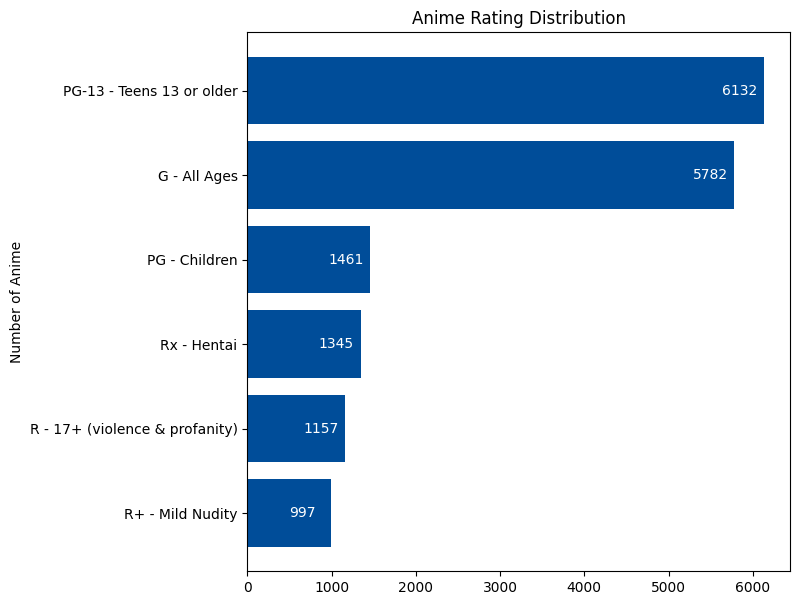

In [11]:
anime_rating = anime['Rating'][anime['Rating'] != 'Unknown'].value_counts().sort_values()

plt.figure(figsize=(7, 7))

plt.title("Anime Rating Distribution")
bars = plt.barh(y=anime_rating.index, width=anime_rating.values, color='#004D99')
plt.bar_label(bars, padding=-30, color='white')
plt.ylabel("Number of Anime")
plt.show()

**Insight:**
- Dapat dilihat pada visualisasi di atas, rating anime paling banyak adalah "PG-13 - Teens 13 or older" atau bisa dikatakan remaja yang berumur 13 tahun ke atas. Rating anime terbanyak kedua adalah all ages artinya semua umur. Secara berurutan, rating anime terbanyak berikutnya adalah "PG - Children" atau anak-anak, "Rx - Hentai" atau anime panas khusus dewasa, "R - 17+ (violence & profanity) artinya mengandung kekerasan dan untuk umur 17 ke atas, dan terakhir adalah "R+ - Mild Nudity" artinya terdapat sedikit adegan yang menampilkan ketelanjangan.

Menampilkan visualisasi distribusi tipe anime

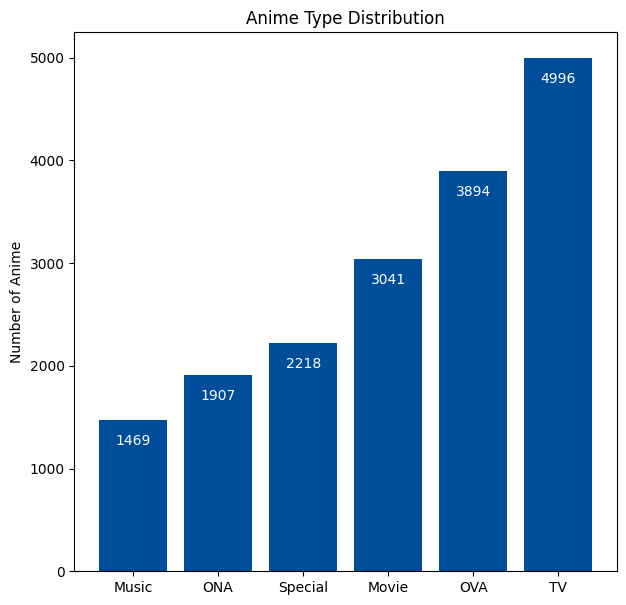

In [12]:
anime_type = anime['Type'][anime['Type'] != 'Unknown'].value_counts().sort_values()

plt.figure(figsize=(7, 7))

plt.title("Anime Type Distribution")
bars = plt.bar(x=anime_type.index, height=anime_type.values, color='#004D99')
plt.bar_label(bars, padding=-20, color='white')
plt.ylabel("Number of Anime")
plt.show()

**Insight:**
- Berdasarkan visualisasi data di atas, tipe anime paling banyak adalah TV (anime yang tayang di TV) diikuti dengan OVA (dipublikasikan langsung dalam format video), Movie (anime yang tampil di layar lebar), Special (biasanya episode ekstra daripada seri anime yang ada), ONA (anime yang dipublikasikan langsung di internet), dan Music (anime yang merupakan video musik, musik latar belakang, dsb).

Menampilkan visualisasi distribusi sumber adaptasi anime

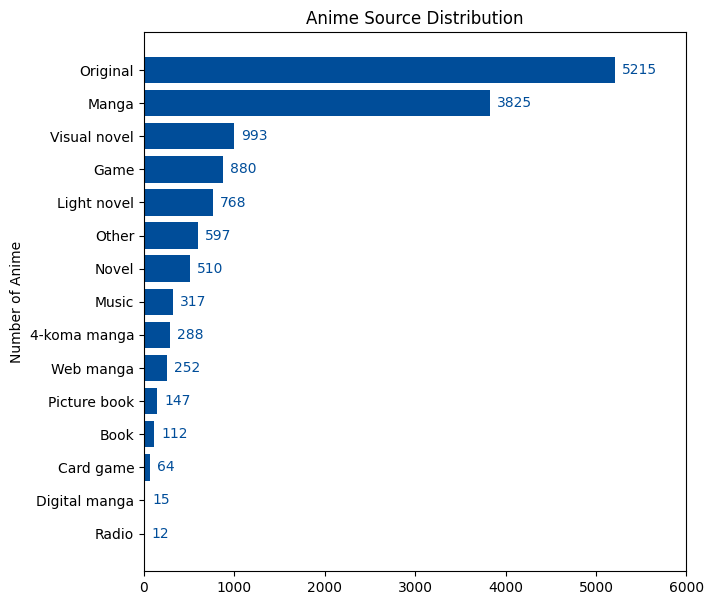

In [13]:
anime_source = anime['Source'][anime['Source'] != 'Unknown'].value_counts().sort_values()

plt.figure(figsize=(7, 7))

plt.title("Anime Source Distribution")
bars = plt.barh(y=anime_source.index, width=anime_source.values, color='#004D99')
plt.bar_label(bars, padding=5, color='#004D99')
plt.ylabel("Number of Anime")
plt.xticks(range(0, 7000, 1000))
plt.show()

**Insight:**
- Berdasarkan visualisasi data di atas, dapat dilihat bahwa sumber adaptasi anime paling banyak adalah Original artinya anime tidak diadaptasikan dari sumber manapun dan langsung dipublikasikan sebagai anime. Sumber adaptasi paling banyak berikutnya adalah Manga (komik jepang) dan diikuti oleh Visual Novel, Game, Light Novel, Other (lainnya/selain yang disebutkan), Novel, Music, 4-koma Manga, Web Manga, Picture book, Book, Card game, Digital manga, dan terakhir adalah Radio.

Menyimpan dataframe anime dengan 3 kolom yaitu MAL_ID, Name, dan Genres ke dalam variabel all_anime.

In [14]:
all_anime = anime[['MAL_ID', 'Name', 'Genres']]
all_anime

,MAL_ID,Name,Genres
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space"
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ..."
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural"
...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,"Adventure, Mystery, Supernatural"
17558,48483,Mieruko-chan,"Comedy, Horror, Supernatural"
17559,48488,Higurashi no Naku Koro ni Sotsu,"Mystery, Dementia, Horror, Psychological, Supe..."
17560,48491,Yama no Susume: Next Summit,"Adventure, Slice of Life, Comedy"


**Insight:**
 - Dataframe dibuat lebih ringkas dengan memuat hanya 3 kolom yang diperlukan untuk membuat recommendation system dengan pendekatan content-based filtering yaitu MAL_ID, Name, Genres.

Menghilangkan data dengan nilai Unknown dari kolom Genres

In [15]:
all_anime = all_anime[all_anime['Genres'] != 'Unknown']
all_anime['Genres']

,Genres
0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,"Action, Drama, Mystery, Sci-Fi, Space"
2,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
3,"Action, Mystery, Police, Supernatural, Drama, ..."
4,"Adventure, Fantasy, Shounen, Supernatural"
...,...
17557,"Adventure, Mystery, Supernatural"
17558,"Comedy, Horror, Supernatural"
17559,"Mystery, Dementia, Horror, Psychological, Supe..."
17560,"Adventure, Slice of Life, Comedy"


**Insight:**
- Data dari kolom Genres akan digunakan untuk menghitung cosine similarity pada tahap modeling sehingga perlu dilakukan pembersihan data yang tidak memiliki informasi mengenai genre.

Mengurutkan anime berdasarkan MAL_ID


In [16]:
sorted_anime = all_anime.sort_values('MAL_ID', ascending=True)
sorted_anime

,MAL_ID,Name,Genres
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space"
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ..."
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural"
...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,"Adventure, Mystery, Supernatural"
17558,48483,Mieruko-chan,"Comedy, Horror, Supernatural"
17559,48488,Higurashi no Naku Koro ni Sotsu,"Mystery, Dementia, Horror, Psychological, Supe..."
17560,48491,Yama no Susume: Next Summit,"Adventure, Slice of Life, Comedy"


**Insight:**
- Memastikan data berurutan dengan melakukan pengurutan menggunakan method sort_values() secara eksplisit. Data diurutkan berdasarkan MAL_ID dan juga diurutkan dari nilai terkecil ke nilai terbesar menggunakan parameter ascending=True.

Assign dataframe sorted_anime ke dalam variabel data kemudian cek 5 sampelnya

In [17]:
data = sorted_anime
data.sample(5)

,MAL_ID,Name,Genres
12821,35096,Hiroshima no Uta,"Drama, Historical"
8063,19363,Gin no Saji 2nd Season,"Comedy, School, Shounen, Slice of Life"
5679,9242,Nine: Original-ban,"Sports, Romance, School, Shounen"
10947,31436,Danchi Tomoo: Natsuyasumi no Shukudai wa Owatt...,"Comedy, Seinen"
679,743,Umi ga Kikoeru,"Drama, Romance, School, Slice of Life"


**Insight:**
- Dataframe sorted_anime di-assign ke variabel baru yaitu data agar dataframe secara deskriptif menunjukkan bahwa ini merupakan data yang akan dipakai untuk modeling sekaligus memudahkan dalam pembacaan variabel.

Mengnisialisasi TfidfVectorizer

In [18]:
tf = TfidfVectorizer(token_pattern=r'(?u)\b\w\w+\s*-*\w+\s*\w+\b')

**Insight:**
- TfidfVectorizer diinisialisasikan dengan parameter token_pattern=r'(?u)\b\w\w+\s*-*\w+\s*\w+\b' agar setiap genre pada setiap anime dapat dipisahkan atau dilakukan tokenisasi per genrenya dengan akurat.

Melakukan fit lalu ditransformasikan ke bentuk matrix dan melihat bentuk matrix tfidf

In [19]:
tfidf_matrix = tf.fit_transform(data['Genres'])

tfidf_matrix.shape

(17499, 43)

**Insight:**
- Bentuk matrix yaitu memiliki 17499 sampel dan 43 fitur.

Membuat dataframe untuk melihat tf-idf matrix (kolom diisi dengan genre dan baris diisi dengan nama anime), mengambil 10 sampel kemudian ditampilkan.

In [29]:
matrix_df = pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.Name
).sample(10, axis=0)
matrix_df

,action,adventure,cars,comedy,dementia,demons,drama,ecchi,fantasy,game,harem,hentai,historical,horror,josei,kids,magic,martial arts,mecha,military,music,mystery,parody,police,psychological,romance,samurai,school,sci-fi,seinen,shoujo,shoujo ai,shounen,shounen ai,slice of life,space,sports,super power,supernatural,thriller,vampire,yaoi,yuri
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MAFF x Chobitto Zukan,0.000000,0.0,0.0,0.582573,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.812778,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
Apron Hero,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.686342,0.0,0.0,0.000000,0.000000,0.727279,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
Sore Ike! Anpanman: Minami no Umi wo Sukue!,0.000000,0.0,0.0,0.465208,0.0,0.0,0.000000,0.0,0.601942,0.000000,0.0,0.0,0.00000,0.0,0.0,0.649036,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
Moshi Juexing Zhi Ruqin 2nd Season,0.359941,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.541205,0.634213,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.418705,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
Hina no Uta,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.686342,0.0,0.0,0.000000,0.000000,0.727279,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
Minami no Shima no Dera-chan,0.000000,0.0,0.0,0.540811,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.841144,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
Puso Ni Comi: Okawari,0.000000,0.0,0.0,0.305523,0.0,0.0,0.000000,0.0,0.000000,0.711724,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.632538,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
Keroro,0.000000,0.0,0.0,0.432741,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.610285,0.0,0.0,0.0,0.663542,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
Flanders no Inu (Movie),0.000000,0.0,0.0,0.000000,0.0,0.0,0.613994,0.0,0.000000,0.000000,0.0,0.0,0.78931,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


**Insight:**
- TF-IDF matrix dimasukkan ke dalam Dataframe baru dengan mengubah bentuknya menjadi dense terlebih dahulu. Kolom menunjukkan setiap fitur atau dalam kasus ini adalah genre sedangkan setiap baris akan menunjukkan nama anime sebagai index.
- Dataframe baru dibuat sebagai visualisasi untuk melihat setiap vector pada setiap anime.

Menghitung cosine similarity pada matrix tf-idf

In [21]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.74999807, 0.69891322, ..., 0.        , 0.33914664,
        0.22885889],
       [0.74999807, 1.        , 0.43956497, ..., 0.19516033, 0.        ,
        0.21840125],
       [0.69891322, 0.43956497, 1.        , ..., 0.        , 0.37749955,
        0.25473974],
       ...,
       [0.        , 0.19516033, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.33914664, 0.        , 0.37749955, ..., 0.        , 1.        ,
        0.        ],
       [0.22885889, 0.21840125, 0.25473974, ..., 0.        , 0.        ,
        1.        ]])

**Insight:**
- Kemiripan antar satu vektor dengan vektor yang lain atau dengan kata lain kemiripian antar satu anime dengan anime yang lain dihitung dengan menggunakan fungsi cosine_similarity() dengan tfidf_matrix sebagai argumen.

Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama anime kemudian melihat similarity antar anime

In [22]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['Name'], columns=data['Name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (17499, 17499)


Name,Saiki Kusuo no Ψ-nan (ONA),An Jie Shen Shi,Uchuu Senkan Tiramisù II Specials,First Squad: The Moment of Truth,Seishun Buta Yarou wa Bunny Girl Senpai no Yume wo Minai
Name,,,,,
Ikusa Otome Valkyrie Shinshou,0.000000,0.0,0.000000,0.0,0.000000
Lovely ♡,0.000000,0.0,0.000000,0.0,0.000000
Kimagure Mercy,0.000000,0.0,0.000000,0.0,0.000000
"On a Forest, in the Air",0.000000,0.0,0.000000,0.0,0.000000
Timeless Tree,0.000000,0.0,0.000000,0.0,0.000000
Hibike! Euphonium Movie: Photo Session e Youkoso,0.336543,0.0,0.239374,0.0,0.303184
Deeper,0.000000,0.0,0.000000,0.0,0.000000
Mon Cheri CoCo,0.000000,0.0,0.000000,0.0,0.286138
Emi to Yobanaide,0.000000,0.0,0.000000,0.0,0.000000


**Insight:**
- Dataframe memberi kemudahan dalam melihat similarity antar anime berdasarkan hasil perhitungan daripada fungsi cosine_similarity.

Mendefinisikan fungsi untuk merekomendasikan anime yang mirip berdasarkan hasil cosine similarity

In [23]:
def anime_recommendations(nama_anime, similarity_data=cosine_sim_df, items=data[['Name', 'Genres']], k=5):
    index = similarity_data.loc[:,nama_anime].to_numpy().argpartition(range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(nama_anime, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

**Insight:**
- Fungsi yang didefinisikan memiliki parameter nama_anime yaitu nama anime sebagai preferensi, similarity_data yaitu data hasil perhitungan cosine similarity, items yaitu data Name dan Genres setiap anime sebelum diterapkan tfidf vectorizer, dan k yaitu jumlah anime yang akan direkomendasikan. Secara default parameter similarity_data, items, dan k telah di-assign nilai default apabila pada saat memanggil fungsi, tidak ada argumen pada parameter-parameter tersebut.

Melihat data anime Slam Dunk

In [24]:
slam_dunk = data[data.Name.eq('Slam Dunk')]
slam_dunk

,MAL_ID,Name,Genres
148,170,Slam Dunk,"Comedy, Drama, School, Shounen, Sports"


**Insight:**
- Anime Slam Dunk dipilih sebagai preferensi yang akan menjadi patokan bagi rekomendasi anime yang akan diberikan.

In [25]:
slam_dunk_genre = slam_dunk['Genres'].values
slam_dunk_genre = slam_dunk_genre[0].split(', ')
print(slam_dunk_genre)

['Comedy', 'Drama', 'School', 'Shounen', 'Sports']


**Insight:**
- Setiap genre pada anime slam dunk dipisahkan satu per satu agar dapat dilakukan perbandingan setiap genre pada setiap rekomendasi anime yang hasilnya akan digunakan untuk menentukan rekomendasi anime yang relevan.

Mendapatkan 100 rekomendasi anime yang mirip dengan Slam Dunk

In [26]:
k = 100
recommendations_df = anime_recommendations('Slam Dunk', k=k)
recommendations_df

,Name,Genres
0,Batsu & Terry,"Comedy, Drama, School, Shounen, Sports"
1,Haikyuu!! Movie 4: Concept no Tatakai,"Comedy, Drama, School, Shounen, Sports"
2,Haikyuu!! Second Season,"Comedy, Sports, Drama, School, Shounen"
3,Haikyuu!!,"Comedy, Sports, Drama, School, Shounen"
4,Haikyuu!!: To the Top,"Comedy, Sports, Drama, School, Shounen"
5,Haikyuu!!: To the Top 2nd Season,"Comedy, Sports, Drama, School, Shounen"
6,Haikyuu!!: Karasuno Koukou vs. Shiratorizawa G...,"Comedy, Sports, Drama, School, Shounen"
7,Ahiru no Sora,"Comedy, Sports, Drama, School, Shounen"
8,Haikyuu!!: Riku vs. Kuu,"Comedy, Sports, Drama, School, Shounen"
9,Haikyuu!! Movie 1: Owari to Hajimari,"Comedy, Sports, Drama, School, Shounen"


**Insight:**
- Setiap anime yang direkomendasikan beserta genre-genrenya dapat dilihat pada dataframe di atas.

Menentukan rekomendasi yang relevan dan menampilkan jumlah rekomendasi yang relevan

In [27]:
rekomendasi_relevan = []

for row in recommendations_df.values:
  relevancy = 0
  for genre in row[1].split(', '):
    if genre in slam_dunk_genre:
      relevancy += 1

  if relevancy > 3:
      rekomendasi_relevan.append(row[0])

print("Jumlah rekomendasi relevan:", len(rekomendasi_relevan))

Jumlah rekomendasi relevan: 77


**Insight:**
- Apabila suatu anime memiliki lebih dari 3 genre yang sama dengan Slam Dunk maka anime tersebut dikatakan relevan.
- Jumlah rekomendasi anime yang relevan akan digunakan pada perhitungan metrik precision.

Menghitung nilai precision dengan membagi nilai total rekomendasi relevan yang didapat yaitu 72 dengan total rekomendasi yaitu 100

In [28]:
total_rekomendasi_relevan = len(rekomendasi_relevan)
total_rekomendasi = k

precision = total_rekomendasi_relevan / total_rekomendasi
print("Nilai precision:", precision)

Nilai precision: 0.77


**Insight:**
- Nilai precision adalah 0.77 artinya dari 100 anime yang direkomendasikan, 77 diantaranya merupakan anime yang relevan dengan anime Slam Dunk.